***DEPENDCIES***

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 21.0 MB/s eta 0:00:0000:01


In [2]:
# Install required libraries
!pip install ultralytics opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 15.9 MB/s eta 0:00:00a 0:00:01


**load the model**

In [3]:
from ultralytics import YOLO

# Load the YOLOv8m pre-trained model
model = YOLO("yolov8m.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 117MB/s] 


**Training the model**

In [4]:
from ultralytics import YOLO

# Paths in Kaggle
dataset_folder = "/kaggle/input/ambulance2"
yaml_file = "/kaggle/input/ambulance2/data.yaml"

# Load the YOLOv8m pre-trained model
model = YOLO("yolov8m.pt")

results = model.train(
    data=yaml_file,
    epochs=50,
    imgsz=640,
    batch=32,
    lr0=0.0001,
    save_period=5,
    name="ambulance_detection_yolov8m",
    device=0,
    verbose=True  # Ensure logs are displayed
)
print("Fine-tuning started successfully!")

Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/ambulance2/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=5, cache=False, device=0, workers=8, project=None, name=ambulance_detection_yolov8m, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 25.7MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 100MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/ambulance2/train/labels... 6992 images, 15 backgrounds, 0 corrupt: 100%|██████████| 6992/6992 [00:31<00:00, 220.20it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/ambulance2/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 8891. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/ambulance2/valid/labels... 1998 images, 4 backgrounds, 0 corrupt: 100%|██████████| 1998/1998 [00:09<00:00, 216.65it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/ambulance2/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 2516. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/ambulance_detection_yolov8m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/ambulance_detection_yolov8m
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       S

       1/50        14G      1.072      1.403      1.561         61        640: 100%|██████████| 219/219 [04:05<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:27<00:00,  1.18it/s]


                   all       1998       2516      0.434      0.428      0.358      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.9G      1.109      1.066      1.586         52        640: 100%|██████████| 219/219 [04:03<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]

                   all       1998       2516      0.745       0.64      0.684      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        14G      1.092      1.035      1.569         49        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:26<00:00,  1.22it/s]


                   all       1998       2516      0.511      0.612      0.554      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      13.9G      1.072     0.9947      1.552         58        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]

                   all       1998       2516      0.791      0.597      0.675      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        14G      1.004     0.8915      1.498         43        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.838       0.71      0.773      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      13.9G     0.9623     0.8346      1.461         45        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]

                   all       1998       2516      0.878        0.7      0.799      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        14G     0.9522     0.8255      1.452         35        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.774      0.758      0.808      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      13.9G     0.9311      0.777       1.43         56        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.894      0.727      0.809      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        14G     0.9171     0.7586      1.419         44        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.847      0.794      0.834      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      13.9G     0.8849     0.7308      1.396         49        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.844      0.795      0.844      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        14G     0.8789     0.7111      1.386         47        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.867      0.788      0.835      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.9G     0.8678      0.689      1.385         54        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.812      0.786      0.834      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50        14G     0.8653     0.6905      1.377         60        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.859      0.811      0.869      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.9G     0.8454     0.6719       1.36         49        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.877      0.786      0.841      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50        14G      0.839     0.6607      1.357         60        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.919      0.796      0.864      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.9G      0.829     0.6468       1.35         44        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.893       0.81      0.872      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        14G     0.8197     0.6356      1.343         48        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.883      0.828      0.888      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      13.9G     0.8185     0.6294      1.346         54        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.926      0.789      0.875      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50        14G     0.8029     0.6108      1.325         55        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.876      0.849      0.896      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.9G     0.7986     0.5987      1.323         53        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.879      0.833      0.887      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        14G     0.7907     0.5935      1.318         51        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.882      0.822      0.883      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.9G     0.7889     0.5912      1.317         49        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.871      0.826      0.883      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        14G     0.7776     0.5897       1.31         44        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.942      0.818      0.899      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.9G     0.7648     0.5757      1.305         45        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]

                   all       1998       2516      0.923      0.831      0.897      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        14G     0.7679     0.5598      1.294         47        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.938      0.826      0.895      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      13.9G     0.7705     0.5609      1.301         45        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.917      0.832      0.901      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        14G     0.7538     0.5513      1.289         60        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.917      0.833      0.905      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      13.9G     0.7527     0.5447      1.289         41        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.907      0.854       0.91      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        14G     0.7329     0.5356      1.276         53        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.942       0.83      0.904      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      13.9G     0.7397     0.5313      1.279         52        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]

                   all       1998       2516      0.945      0.831      0.909      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        14G     0.7219     0.5227      1.267         41        640: 100%|██████████| 219/219 [04:02<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]

                   all       1998       2516       0.94      0.837      0.907      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      13.9G     0.7133     0.5183      1.265         84        640:  45%|████▌     | 99/219 [01:50<02:13,  1.12s/it]


KeyboardInterrupt: 

In [1]:
"""Dummmy code """


from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model_path = "/kaggle/working/runs/detect/ambulance_detection_yolov8m/weights/best.pt"
model = YOLO(model_path)

# Test on a single image
image_path = "/kaggle/input/testimages/test img 1.png"  # Replace with your image path
results = model.predict(source=image_path, save=True, save_txt=True)

# Visualize the results
for r in results:
    im_array = r.plot()  # Plot predictions on the image
    im = Image.fromarray(im_array[..., ::-1])  # Convert to PIL image
    plt.imshow(im)
    plt.axis('off')
    plt.show()

ModuleNotFoundError: No module named 'ultralytics'

In [1]:

"""Dummmy code  """

import os

# Path to the uploaded checkpoint
checkpoint_path = "/kaggle/input/lastpt/last.pt"

if os.path.exists(checkpoint_path):
    print("Checkpoint file found!")
else:
    print("Checkpoint file not found. Please check the path.")

Checkpoint file found!


**Resume Training** 

In [2]:
from ultralytics import YOLO

# Path to the uploaded checkpoint
checkpoint_path = "/kaggle/input/lastpt/last.pt"  # Replace with your actual path

# Load the checkpoint
model = YOLO(checkpoint_path)

# Resume training
results = model.train(
    data="/kaggle/input/ambulance2/data.yaml",  # Path to your dataset YAML file
    epochs=50,                                 # Total number of epochs (including previous epochs)
    imgsz=640,                                 # Image size
    batch=16,                                  # Batch size
    lr0=0.0001,                                # Learning rate
    save_period=5,                             # Save checkpoint every 5 epochs
    name="ambulance_detection_yolov8m",        # Experiment name
    device=0,                                  # Use GPU 0 (or [0, 1] for multi-GPU)
    resume=True                                # Resume training from the checkpoint
)

print("Resuming training successfully!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/lastpt/last.pt, data=/kaggle/input/ambulance2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=0, workers=8, project=None, name=ambulance_detection_yolov8m, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/kaggle/input/lastpt/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=Tr

100%|██████████| 755k/755k [00:00<00:00, 28.9MB/s]


TensorBoard: Start with 'tensorboard --logdir runs/detect/ambulance_detection_yolov8m', view at http://localhost:6006/

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f            

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/ambulance2/train/labels... 6992 images, 15 backgrounds, 0 corrupt: 100%|██████████| 6992/6992 [00:37<00:00, 184.58it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/ambulance2/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 8891. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/ambulance2/valid/labels... 1998 images, 4 backgrounds, 0 corrupt: 100%|██████████| 1998/1998 [00:09<00:00, 203.07it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/ambulance2/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 2516. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/ambulance_detection_yolov8m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Resuming training /kaggle/input/lastpt/last.pt from epoch 32 to 50 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/ambulance_detection_yolov8m
Starting training for 50 epoch

      32/50      8.21G      0.746     0.5416      1.286         49        640: 100%|██████████| 437/437 [04:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.32it/s]

                   all       1998       2516      0.941       0.83      0.903      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.96G     0.7293     0.5332      1.276         55        640: 100%|██████████| 437/437 [04:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.41it/s]

                   all       1998       2516      0.925      0.848      0.907      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.06G     0.7117     0.5114       1.26         57        640: 100%|██████████| 437/437 [04:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.43it/s]

                   all       1998       2516      0.896      0.863      0.907      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.05G     0.7209     0.5137      1.264         54        640: 100%|██████████| 437/437 [04:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.41it/s]

                   all       1998       2516      0.922      0.843      0.906      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.04G     0.7071     0.5003      1.256         52        640: 100%|██████████| 437/437 [04:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.41it/s]

                   all       1998       2516      0.922      0.852      0.911      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.96G     0.6961     0.4889      1.248         42        640: 100%|██████████| 437/437 [04:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.43it/s]

                   all       1998       2516      0.919      0.862      0.914      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.06G     0.6951     0.4874      1.248         49        640: 100%|██████████| 437/437 [04:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.42it/s]

                   all       1998       2516      0.916      0.864      0.916      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.04G      0.682     0.4843      1.237         51        640: 100%|██████████| 437/437 [04:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.42it/s]

                   all       1998       2516      0.936      0.869       0.92      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.04G     0.6816     0.4683      1.238         48        640: 100%|██████████| 437/437 [04:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.42it/s]

                   all       1998       2516      0.919      0.861      0.918      0.673


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.96G     0.6226     0.3663      1.292         21        640: 100%|██████████| 437/437 [04:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.41it/s]

                   all       1998       2516       0.93       0.87      0.921      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.07G     0.5974     0.3445      1.272         19        640: 100%|██████████| 437/437 [04:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.42it/s]

                   all       1998       2516       0.94      0.864      0.922      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.05G      0.589     0.3315      1.259         25        640: 100%|██████████| 437/437 [04:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.42it/s]

                   all       1998       2516      0.927      0.879      0.922      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.05G     0.5701      0.324      1.241         16        640: 100%|██████████| 437/437 [04:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.42it/s]

                   all       1998       2516      0.915      0.879      0.919      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.96G     0.5593     0.3133      1.237         26        640: 100%|██████████| 437/437 [04:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.42it/s]

                   all       1998       2516      0.928      0.876       0.93      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.24G     0.5494     0.3035       1.22         23        640: 100%|██████████| 437/437 [04:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.42it/s]

                   all       1998       2516      0.932      0.884      0.932      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.05G     0.5363     0.2968       1.21         23        640: 100%|██████████| 437/437 [04:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.42it/s]

                   all       1998       2516      0.941      0.881      0.931      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.05G     0.5288     0.2924      1.207         19        640: 100%|██████████| 437/437 [04:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.42it/s]

                   all       1998       2516      0.947      0.882      0.931      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.96G     0.5172     0.2831      1.194         19        640: 100%|██████████| 437/437 [04:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.43it/s]

                   all       1998       2516      0.946      0.885      0.931      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.03G     0.5111     0.2793      1.182         17        640: 100%|██████████| 437/437 [04:30<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.43it/s]

                   all       1998       2516      0.954      0.878      0.931      0.707



19 epochs completed in 1.577 hours.
Optimizer stripped from runs/detect/ambulance_detection_yolov8m/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/ambulance_detection_yolov8m/weights/best.pt, 52.0MB

Validating runs/detect/ambulance_detection_yolov8m/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:27<00:00,  2.30it/s]


                   all       1998       2516      0.943      0.881      0.931      0.713
             Ambulance       1702       1981       0.95       0.94      0.973      0.796
                 Label         58         80      0.973          1      0.991      0.708
          Misc Vehicle        270        316      0.951      0.883       0.96      0.878
                 Siren        109        139      0.899      0.701      0.801       0.47


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 10.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/ambulance_detection_yolov8m
Resuming training successfully!


**Image tester**


image 1/1 /kaggle/input/testimages/test img 4.jpg: 384x640 2 Ambulances, 117.7ms
Speed: 1.6ms preprocess, 117.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict20
1 label saved to runs/detect/predict20/labels


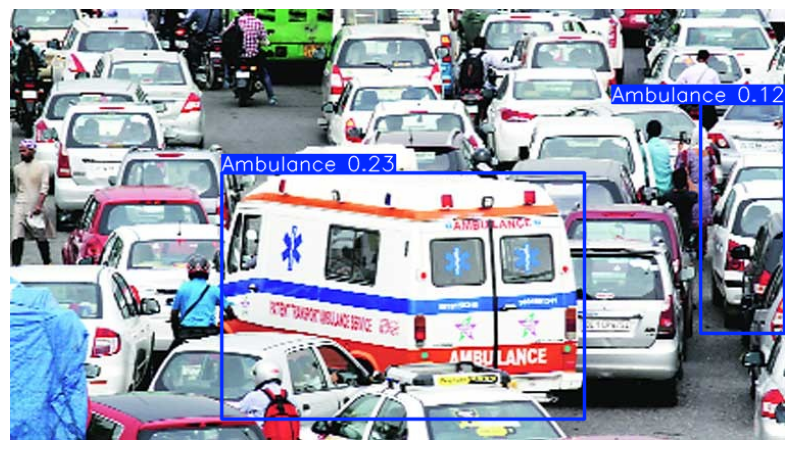

Detection Results:
Class: 0, Confidence: 0.23, BBox: [207.9448699951172, 160.31488037109375, 562.182861328125, 401.80810546875]
Class: 0, Confidence: 0.12, BBox: [676.6294555664062, 92.66197204589844, 758.9951171875, 317.8133850097656]


In [4]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model_path = "/kaggle/working/runs/detect/ambulance_detection_yolov8m/weights/best.pt"  # Path to your saved model
model = YOLO(model_path)

# Test on a single image
image_path = "/kaggle/input/testimages/test img 4.jpg"  # Replace with the path to your test image

# Adjust confidence threshold and IoU threshold
results = model.predict(
    source=image_path,
    save=True,         # Save annotated images
    save_txt=True,     # Save detection results as .txt files
    conf=0.1,          # Lower confidence threshold to capture more detections
    iou=0.5            # Adjust IoU threshold for non-max suppression
)

# Visualize the results
for r in results:
    im_array = r.plot()  # Plot predictions on the image
    im = Image.fromarray(im_array[..., ::-1])  # Convert to PIL image
    plt.figure(figsize=(10, 10))  # Adjust figure size for better visualization
    plt.imshow(im)
    plt.axis('off')
    plt.show()

    # Print detailed detection results
    print("Detection Results:")
    for box in r.boxes:  # Iterate through detected bounding boxes
        class_id = int(box.cls)  # Class ID
        confidence = float(box.conf)  # Confidence score
        bbox = box.xyxy[0].tolist()  # Bounding box coordinates [x1, y1, x2, y2]
        print(f"Class: {class_id}, Confidence: {confidence:.2f}, BBox: {bbox}")

**Video Tester**



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/469) /kaggle/input/ambu-test/3759222-hd_1920_1080_30fps.mp4: 736x1280 1 Siren, 42.8ms
video 1/1 (frame 2/469) /kaggle/input/ambu-test/3759222-hd_1920_1080_30fps.mp4: 736x1280 1 Siren, 28.5ms
video 1/1 (frame 3/469) /kaggle/input/ambu-test/3759222-hd_1920_1080_30fps.mp4: 736x1280 1 Siren, 28.5ms
video 1/1 (frame 4/469) /kaggle/input/ambu-test/3759222-hd_1920_1080_30fps.mp4: 736x1280 1 Siren, 28.5ms
video 1/1 (frame 5/469) /kaggle/inpu

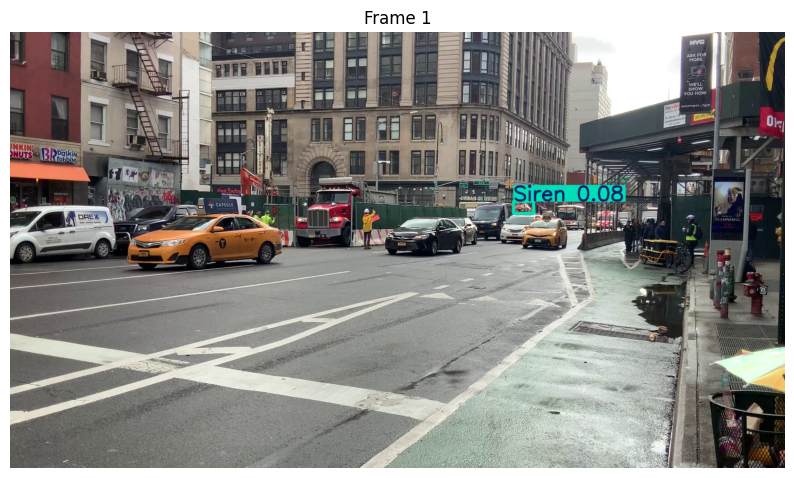

Detection Results for Frame 1:
Class: 3, Confidence: 0.08, BBox: [1247.2867431640625, 419.9923095703125, 1297.5645751953125, 449.9476318359375], Area: 1506.088661313057


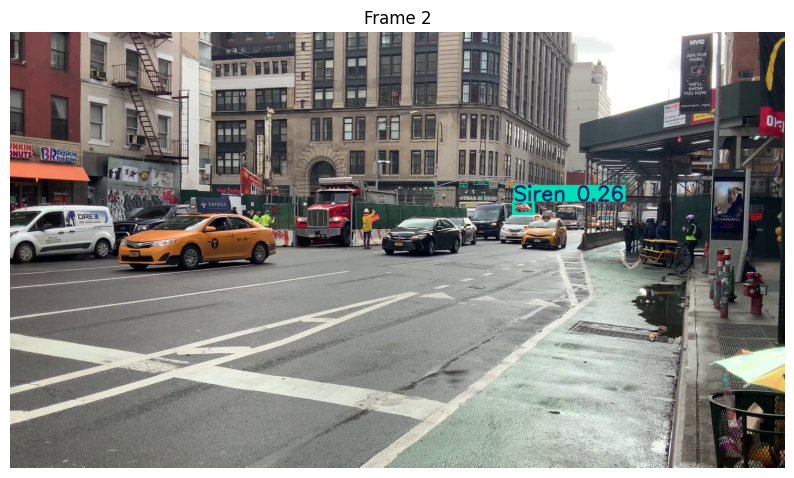

Detection Results for Frame 2:
Class: 3, Confidence: 0.26, BBox: [1247.1873779296875, 419.70703125, 1296.90966796875, 450.26824951171875], Area: 1519.5737583562732


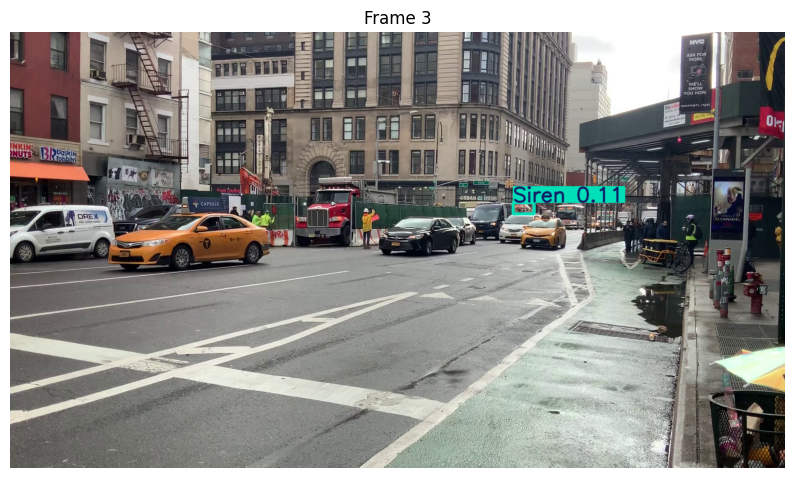

Detection Results for Frame 3:
Class: 3, Confidence: 0.11, BBox: [1246.908935546875, 422.2876281738281, 1298.5477294921875, 450.3247375488281], Area: 1447.8025138378143


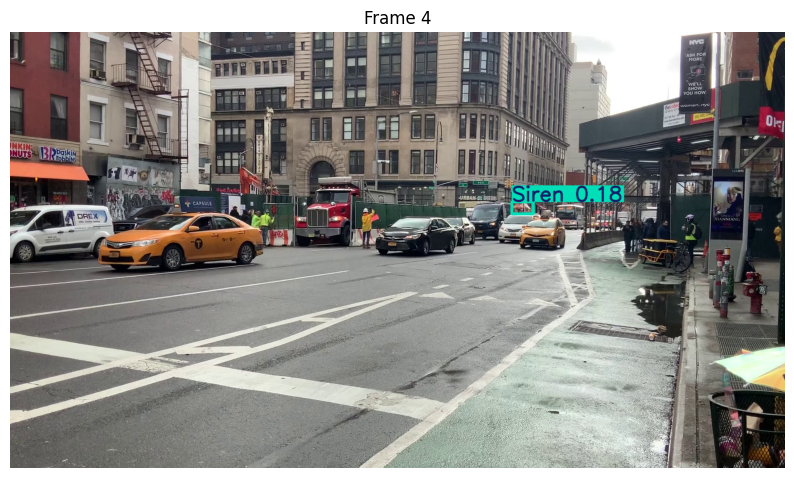

Detection Results for Frame 4:
Class: 3, Confidence: 0.18, BBox: [1243.944580078125, 420.6153259277344, 1296.6624755859375, 450.18988037109375], Area: 1559.1082708351314


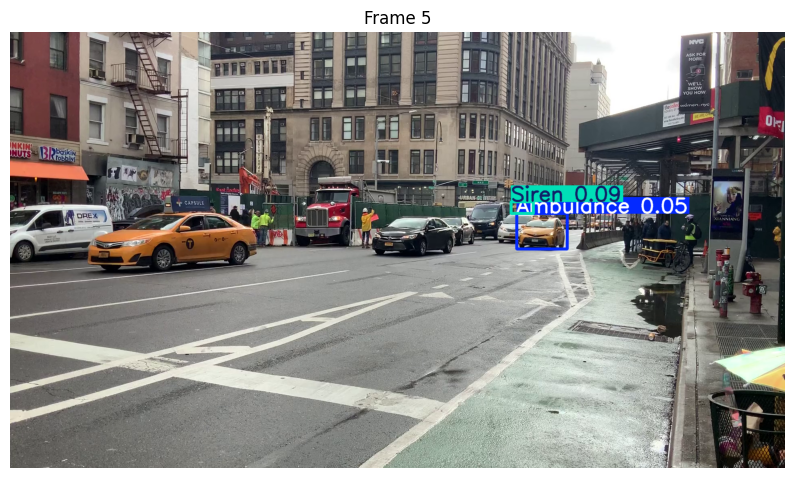

Detection Results for Frame 5:
Class: 3, Confidence: 0.09, BBox: [1241.953125, 420.20306396484375, 1296.961669921875, 449.92437744140625], Area: 1634.926207512617
Class: 0, Confidence: 0.05, BBox: [1255.229736328125, 449.9517517089844, 1380.158935546875, 537.71533203125], Area: 10964.23381023109


In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model_path = "/kaggle/working/runs/detect/ambulance_detection_yolov8m/weights/best.pt"
model = YOLO(model_path)

# Test on a video
video_path = "/kaggle/input/ambu-test/3759222-hd_1920_1080_30fps.mp4"  # Replace with your test video path
output_path = "/kaggle/working/output_video.mp4"        # Path to save the annotated video

# Adjust parameters for better detection of distant objects
results = model.predict(
    source=video_path,
    save=True,         # Save annotated video
    conf=0.05,         # Lower confidence threshold
    iou=0.5,           # Adjust IoU threshold
    imgsz=1280,        # Increase input resolution
    show=False          # Do not display frames in real-time
)

# Debugging: Visualize and analyze the first few frames
for i, r in enumerate(results[:5]):  # Process only the first 5 frames for debugging
    im_array = r.plot()  # Plot predictions on the frame
    im = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

    # Display the frame
    plt.figure(figsize=(10, 10))
    plt.imshow(im)
    plt.title(f"Frame {i + 1}")
    plt.axis('off')
    plt.show()

    # Print detailed detection results for the frame
    print(f"Detection Results for Frame {i + 1}:")
    for box in r.boxes:  # Iterate through detected bounding boxes
        class_id = int(box.cls)  # Class ID
        confidence = float(box.conf)  # Confidence score
        bbox = box.xyxy[0].tolist()  # Bounding box coordinates [x1, y1, x2, y2]
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        area = width * height
        print(f"Class: {class_id}, Confidence: {confidence:.2f}, BBox: {bbox}, Area: {area}")

In [1]:
"""Dummmy code """



from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model_path = "/kaggle/working/runs/detect/ambulance_detection_yolov8m/weights/best.pt"  # Path to your saved model
model = YOLO(model_path)

# Test on a video
video_path = "/kaggle/input/ambu-test/3759222-hd_1920_1080_30fps.mp4"  # Replace with the path to your test video
output_path = "/kaggle/working/output_video.mp4"        # Path to save the annotated video

# Adjust confidence threshold and IoU threshold
results = model.predict(
    source=video_path,
    save=True,         # Save annotated video
    conf=0.1,          # Lower confidence threshold to capture more detections
    iou=0.5,           # Adjust IoU threshold for non-max suppression
    show=False          # Do not display frames in real-time (optional)
)

# Visualize and debug detections for the first few frames
for i, r in enumerate(results[:5]):  # Process only the first 5 frames for debugging
    im_array = r.plot()  # Plot predictions on the frame
    im = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

    # Display the frame
    plt.figure(figsize=(10, 10))
    plt.imshow(im)
    plt.title(f"Frame {i + 1}")
    plt.axis('off')
    plt.show()

    # Print detailed detection results for the frame
    print(f"Detection Results for Frame {i + 1}:")
    for box in r.boxes:  # Iterate through detected bounding boxes
        class_id = int(box.cls)  # Class ID
        confidence = float(box.conf)  # Confidence score
        bbox = box.xyxy[0].tolist()  # Bounding box coordinates [x1, y1, x2, y2]
        print(f"Class: {class_id}, Confidence: {confidence:.2f}, BBox: {bbox}")

ModuleNotFoundError: No module named 'ultralytics'